# Runtimeanalysis for Metro dataset

In [1]:
# std
import os
import sys
import inspect
import time
import pathlib
import glob
from math import sqrt
from math import log2
# packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap

# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.regression_plotfunctions import *




In [29]:
def plot_CV_with_Std(df, y = "R2_score", regressor = "sklearn", titel = "score vs stabdartdeviation", SaveName = False):
    kmax  = np.max(df["k"])
    list_k = np.linspace(1, kmax, num=kmax)
    std_list = np.zeros(kmax)
    mean_list = np.zeros(kmax)
    for k in list_k:
        df_tmp = df[df["k"] == k]
        std_list[int(k-1)] = np.std(df_tmp[y])
        mean_list[int(k-1)] = np.mean(df_tmp[y])
    plt.semilogy(list_k, mean_list, '-', label = regressor)
    plt.fill_between(list_k, mean_list - std_list, mean_list + std_list, alpha=0.2)
    plt.grid()
    plt.legend(fontsize=18)
    plt.xlabel("k-splits", fontsize=18)
    plt.title(titel, fontsize=18)
    plt.ylabel(y, fontsize=18)
    print(std_list)
    if SaveName:
        plt.savefig(SaveName)

            
            

In [38]:
def plot_CV_with_Std(df, y = "R2_score", ax=None, regressor = "sklearn", titel = "R2-Score", SaveName = False, plot_std=True):
    if ax==None:
        ax = plt.gca()
    plt.sca(ax)
    kmax  = np.max(df["k"])
    list_k = np.linspace(1, kmax, num=kmax)
    std_list = np.zeros(kmax)
    mean_list = np.zeros(kmax)
    for k in list_k:
        df_tmp = df[df["k"] == k]
        std_list[int(k-1)] = np.std(df_tmp[y])
        mean_list[int(k-1)] = np.mean(df_tmp[y])
    plt.semilogy(list_k, mean_list, '-', label = regressor)
    if plot_std:
        plt.fill_between(list_k, mean_list - std_list, mean_list + std_list, alpha=0.2)
    plt.grid(True)
    plt.legend()
    plt.xlabel("k-splits")
    plt.suptitle(titel)
    if "time" in y:
        plt.ylabel("time [s]")
    else:
        plt.ylabel(y)
    if SaveName:
        plt.savefig(SaveName)

In [30]:
def print_styling(figsize=(10,8)):
    plt.rc('figure', figsize=figsize) 
    plt.style.use("seaborn")
    sns.set_palette("dark")
    SMALL_SIZE = 15
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 26

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('lines', linewidth=2)

    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## SGD

In [4]:
df_CV_SGD_raw = pd.read_csv("out/SGD/sklearn_CV_SGD_raw.csv")
df_CV_my_SGD_raw = pd.read_csv("out/SGD/my_CV_SGD_raw.csv")
df_CV_SGD_transforamtion = pd.read_csv("out/SGD/sklearn_CV_SGD_transforamtion.csv")
df_CV_my_SGD_transforamtion = pd.read_csv("out/SGD/my_CV_SGD_transforamtion.csv")

[0.00142051 0.00104506 0.00079443 0.0009463  0.00085049 0.00073582
 0.00146417 0.00056244 0.00149175 0.00133441]
[4.57443026e-12 1.87944205e-12 2.61981898e-12 1.92078559e-12
 2.70789390e-15 3.08391227e-12 1.13232097e-12 1.09042667e-12
 1.71313161e-13 8.47983163e-13]


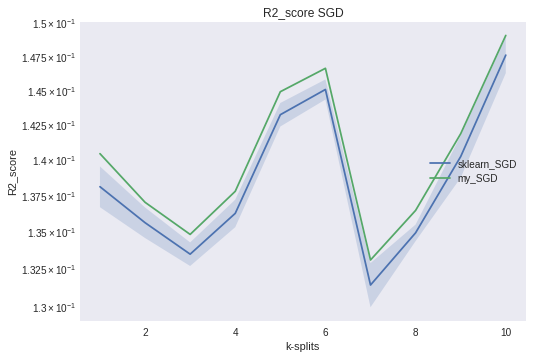

In [5]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_raw,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2_raw")

[0.00113714 0.00163176 0.00098816 0.00229407 0.00080443 0.00108982
 0.00091382 0.0013628  0.00185249 0.0011873 ]
[2.76351820e-12 2.05168232e-12 2.10703346e-12 2.20654488e-12
 1.56938387e-13 1.65650454e-12 9.78889073e-13 1.36390537e-12
 8.82051691e-14 8.21308135e-13]


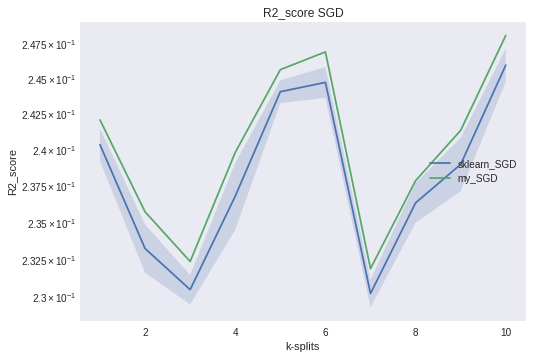

In [6]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_transforamtion,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_transforamtion,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2_transforamtion")

[0.00142051 0.00104506 0.00079443 0.0009463  0.00085049 0.00073582
 0.00146417 0.00056244 0.00149175 0.00133441]
[4.57443026e-12 1.87944205e-12 2.61981898e-12 1.92078559e-12
 2.70789390e-15 3.08391227e-12 1.13232097e-12 1.09042667e-12
 1.71313161e-13 8.47983163e-13]
[0.00113714 0.00163176 0.00098816 0.00229407 0.00080443 0.00108982
 0.00091382 0.0013628  0.00185249 0.0011873 ]
[2.76351820e-12 2.05168232e-12 2.10703346e-12 2.20654488e-12
 1.56938387e-13 1.65650454e-12 9.78889073e-13 1.36390537e-12
 8.82051691e-14 8.21308135e-13]


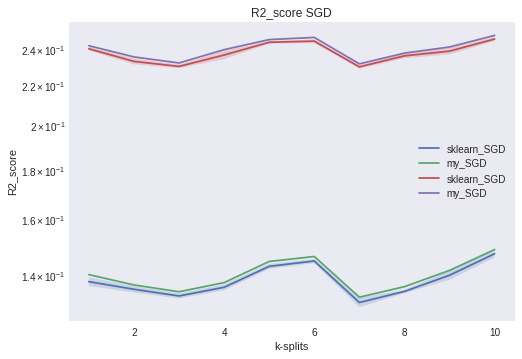

In [7]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_raw,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "R2_score",regressor = "my_SGD",titel="CV Plot")
plot_CV_with_Std(df_CV_SGD_transforamtion,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_transforamtion,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2")

## KNN

In [8]:
df_CV_KNN_transforamtion = pd.read_csv("out/KNN/sklearn_CV_KNN_transformation.csv")
df_CV_KNN_raw = pd.read_csv("out/KNN/sklearn_CV_KNN_raw.csv")
df_CV_my_KNN_transforamtion = pd.read_csv("out/KNN/my_CV_KNN_transformation.csv")
df_CV_my_KNN_raw = pd.read_csv("out/KNN/my_CV_KNN_raw.csv")

[0.01331556 0.010045   0.01004734 0.00992712 0.00668021 0.0085803
 0.00764044 0.00828348 0.0107442  0.00836447]
[0.00554975 0.00577031 0.00535036 0.00934529 0.00831935 0.00336577
 0.008477   0.01050984 0.01164415 0.01070659]


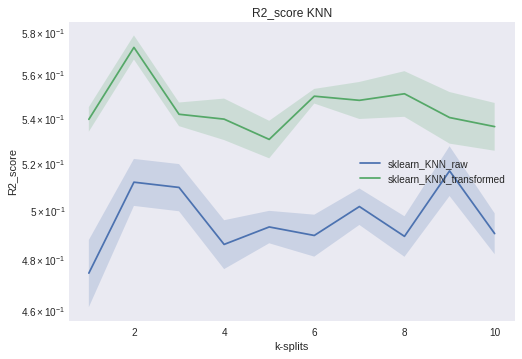

In [9]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_KNN_raw,y = "R2_score",regressor = "sklearn_KNN_raw",titel="R2_score KNN")
plot_CV_with_Std(df_CV_KNN_transforamtion,y = "R2_score",regressor = "sklearn_KNN_transformed",titel="R2_score KNN")
plt.grid()
plt.savefig("out/KNN/CV_Plot_my_vs_sklearn_KNN_R2")

[3.55871077e-03 7.42120508e-04 4.95428442e-03 8.10455581e-03
 4.47738135e-04 6.77731205e-04 3.41975513e-05 9.54832231e-04
 3.28872822e-03 3.12095404e-04]
[0.00555273 0.00577031 0.00535024 0.00934529 0.00831935 0.00336577
 0.00847705 0.01052325 0.01164415 0.01070641]


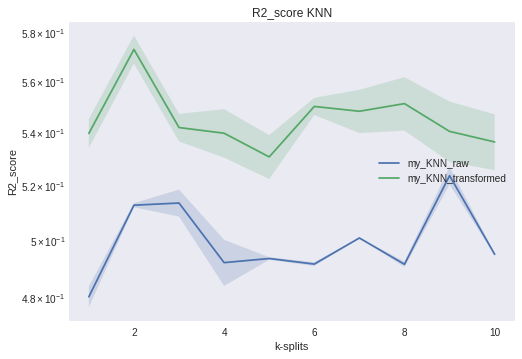

In [10]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_my_KNN_raw,y = "R2_score",regressor = "my_KNN_raw",titel="R2_score myKNN")
plot_CV_with_Std(df_CV_my_KNN_transforamtion,y = "R2_score",regressor = "my_KNN_transformed",titel="R2_score KNN")

plt.grid()
plt.savefig("out/KNN/CV_Plot_my_vs_sklearn_myKNN_R2")

## RM-sklearn

In [11]:
df_CV_RF_transforamtion = pd.read_csv("out/RF/sklearn_CV_RF_transforamtion.csv")
df_CV_RF_raw = pd.read_csv("out/RF/sklearn_CV_RF_raw.csv")

[0.00881346 0.00820516 0.00750671 0.00950635 0.00881901 0.01055344
 0.00731802 0.00837707 0.00947026 0.00788728]
[0.00619797 0.00736317 0.00662578 0.00663074 0.00708894 0.00648538
 0.00669972 0.00740458 0.00672438 0.00651755]


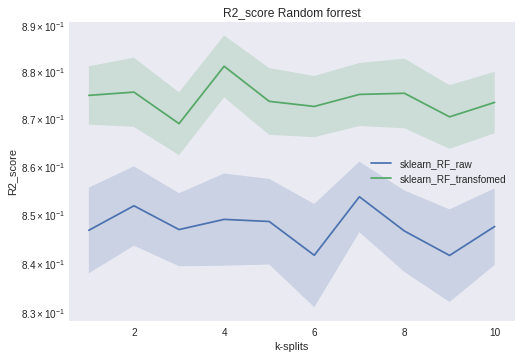

In [12]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_RF_raw,y = "R2_score",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_RF_transforamtion,y = "R2_score",regressor = "sklearn_RF_transfomed",titel="R2_score Random forrest")
plt.grid()
plt.savefig("out/RF/CV_Plot_sklearn_RF_R2")

## DT-sklearn

In [13]:
df_CV_DT_transforamtion = pd.read_csv("out/DT/sklearn_CV_DT_transforamtion.csv")
df_CV_DT_raw = pd.read_csv("out/DT/sklearn_CV_DT_raw.csv")

[0.00686644 0.01283008 0.00700802 0.00800394 0.00771657 0.01909972
 0.00513993 0.01752435 0.00463234 0.01276745]
[0.00152204 0.00401654 0.01292134 0.00903448 0.00717671 0.01058479
 0.00681869 0.00354368 0.01819406 0.01450707]


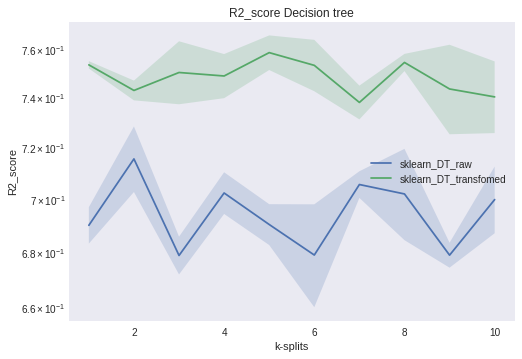

In [14]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_DT_raw,y = "R2_score",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_DT_transforamtion,y = "R2_score",regressor = "sklearn_DT_transfomed",titel="R2_score Decision tree")
plt.grid()
plt.savefig("out/DT/CV_Plot_sklearn_DT_R2")

## runtime

[0.02888667 0.03950898 0.04000994 0.02768761 0.02742008 0.02657983
 0.02420701 0.02051681 0.02747641 0.02065257]
[0.00075165 0.00203831 0.00030937 0.00025097 0.00015905 0.00054874
 0.00072974 0.00016127 0.00027638 0.00037232]
[8.80191266 8.56603901 8.64478639 8.62706536 8.5980428  8.59767259
 8.62914158 8.78640368 8.67019295 8.29525041]
[0.07616945 0.07534138 0.07298446 0.07516938 0.0751649  0.07688972
 0.08593762 0.07930452 0.07531889 0.07561428]
[1.84580766 1.98397698 1.98866429 1.98028112 1.51605018 1.34284646
 1.37321044 1.39216874 1.70534689 1.5167081 ]
[1.21748556e-06 1.86073019e-06 1.59293034e-06 1.60957068e-06
 2.14677878e-06 2.03501349e-06 1.22862060e-06 2.01238636e-06
 2.25134142e-06 1.93529060e-06]


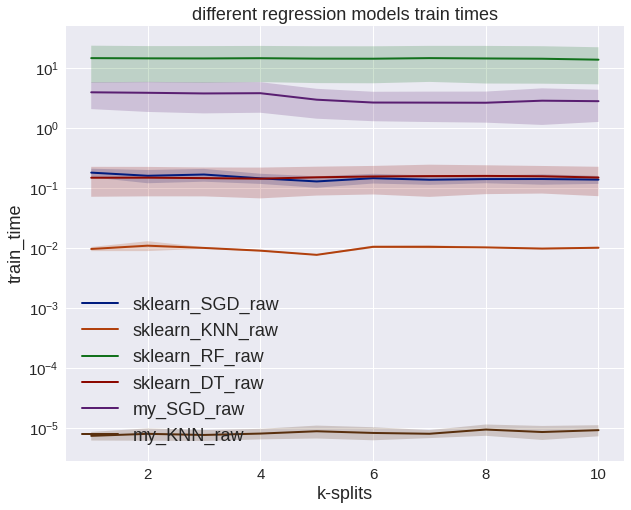

In [34]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,8))
print_styling()
plot_CV_with_Std(df_CV_SGD_raw,y = "train_time",regressor = "sklearn_SGD_raw")
plot_CV_with_Std(df_CV_KNN_raw,y = "train_time",regressor = "sklearn_KNN_raw")
plot_CV_with_Std(df_CV_RF_raw,y = "train_time",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_DT_raw,y = "train_time",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "train_time",regressor = "my_SGD_raw")
plot_CV_with_Std(df_CV_my_KNN_raw,y = "train_time",regressor = "my_KNN_raw",titel="different regression models train times")
plt.savefig("out/runtimes/diff_traintimes")


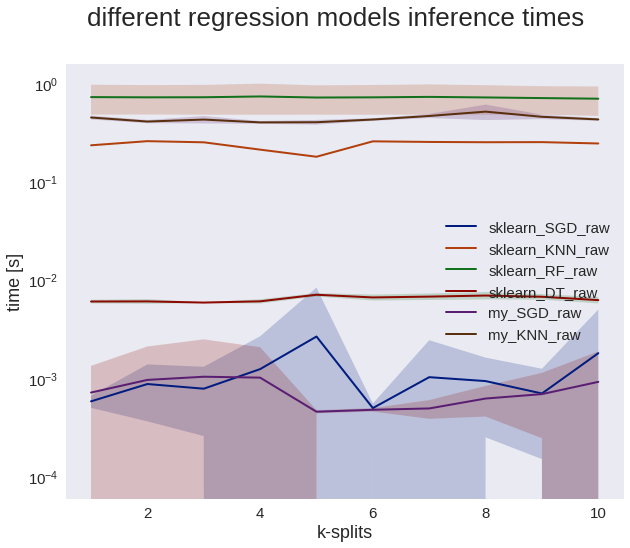

In [40]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,8))
print_styling()
plot_CV_with_Std(df_CV_SGD_raw,y = "inference_time",regressor = "sklearn_SGD_raw")
plot_CV_with_Std(df_CV_KNN_raw,y = "inference_time",regressor = "sklearn_KNN_raw", plot_std=False)
plot_CV_with_Std(df_CV_RF_raw,y = "inference_time",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_DT_raw,y = "inference_time",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "inference_time",regressor = "my_SGD_raw")
plot_CV_with_Std(df_CV_my_KNN_raw,y = "inference_time",regressor = "my_KNN_raw",titel="different regression models inference times")
plt.grid()
plt.savefig("out/runtimes/diff_inferencetimes")

[0.23709708 0.26347979 0.25983451 0.21309356 0.1758903  0.26651243
 0.26218461 0.26012383 0.26147806 0.25123708]


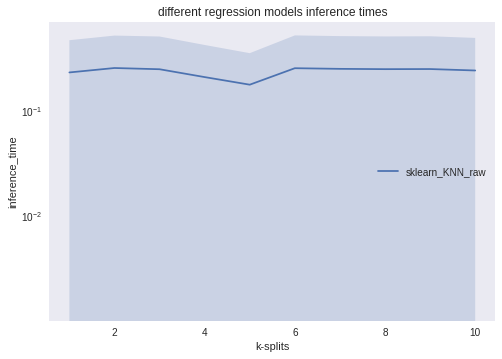

In [17]:
plot_CV_with_Std(df_CV_KNN_raw,y = "inference_time",regressor = "sklearn_KNN_raw",titel="different regression models inference times")

In [18]:
df_CV_KNN_raw

,weights,n_neighbors,p,train_time,inference_time,k,R2_score,RMSE,D,N,n_test,n_train
0,uniform,5,1,0.011171,0.072420,1,0.452094,2.227199e+06,10,4999,1500,3499
1,uniform,5,2,0.009461,0.054120,1,0.475845,2.130654e+06,10,4999,1500,3499
2,uniform,5,3,0.009429,0.543851,1,0.465818,2.171412e+06,10,4999,1500,3499
3,uniform,10,1,0.008974,0.072421,1,0.494400,2.055228e+06,10,4999,1500,3499
4,uniform,10,2,0.009512,0.058490,1,0.483802,2.098309e+06,10,4999,1500,3499
5,uniform,10,3,0.008910,0.588877,1,0.475993,2.130052e+06,10,4999,1500,3499
6,uniform,5,1,0.010397,0.067897,2,0.506278,1.994167e+06,10,4999,1500,3499
7,uniform,5,2,0.009612,0.057356,2,0.513487,1.965049e+06,10,4999,1500,3499
8,uniform,5,3,0.009588,0.593727,2,0.505612,1.996857e+06,10,4999,1500,3499
9,uniform,10,1,0.015369,0.090823,2,0.532895,1.886657e+06,10,4999,1500,3499
